<a href="https://colab.research.google.com/github/Soumitra2948/Python_Project/blob/main/cnn_flower_image_classification_data_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.', untar=True)


228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/7199968650_72afc16d31_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4440480869_632ce6aff3_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/9467543719_c4800becbb_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4654579740_6671a53627_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/3474942718_c418dae6f1.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg'),
 PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg')]

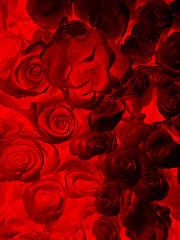

In [ ]:
PIL.Image.open(str(roses[7]))

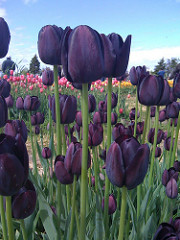

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[8]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg'),
 PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 87s 990ms/step - loss: 1.3202 - accuracy: 0.4480
Epoch 2/5
86/86 [==============================] - 80s 931ms/step - loss: 1.0329 - accuracy: 0.5828
Epoch 3/5
86/86 [==============================] - 84s 980ms/step - loss: 0.8465 - accuracy: 0.6806
Epoch 4/5
86/86 [==============================] - 84s 980ms/step - loss: 0.7004 - accuracy: 0.7395
Epoch 5/5
86/86 [==============================] - 83s 962ms/step - loss: 0.5062 - accuracy: 0.8183


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 319ms/step - loss: 1.1709 - accuracy: 0.6024


[1.17086923122406, 0.6023964881896973]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 9s 310ms/step


array([[ 0.7769679 ,  2.6764486 ,  3.1472094 , -0.34774303,  0.39074188],
       [ 7.594935  ,  0.8545048 , -3.3302019 , -2.5861685 ,  7.0134196 ],
       [-1.3398935 , -0.2580019 ,  2.7317958 ,  5.8485956 ,  1.1113577 ],
       ...,
       [ 1.6533434 ,  3.6757    , -0.0777543 , -0.89455587,  1.3828537 ],
       [ 1.3726069 ,  1.6023735 ,  0.7866804 , -0.8955783 , -0.06360141],
       [-1.1645266 , -1.5590142 ,  2.6737673 ,  5.3028173 ,  2.1330209 ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

2

In [ ]:
y_test[0]

1

In [ ]:
import keras
from keras import layers
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.4),
  ]
)

**Original Image**

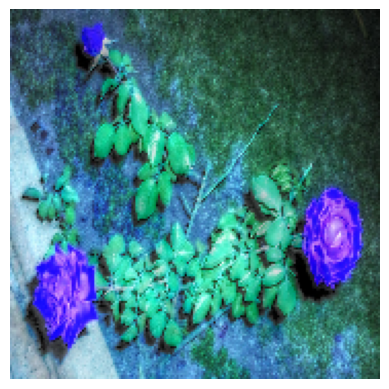

In [ ]:
plt.axis('off')
plt.imshow(X[1])

**Newly generated training sample using data augmentation**

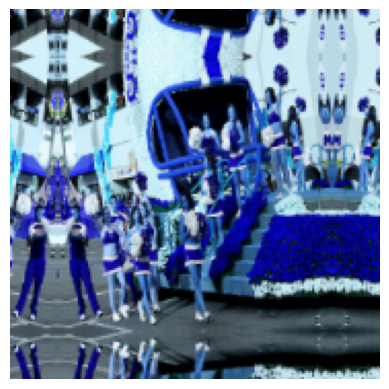

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

NameError: ignored

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 132ms/step - loss: 1.3781 - accuracy: 0.4891


[1.3781402111053467, 0.4891067445278168]